** Zadatak 1: **  
Skup od $n$ lampi osvetljava površinu koja je podeljena u $m$ regiona. Neka je $l_i$ nivo osvetljenja u regionu $i$. Dalje, neka je $p_i$ snaga lampe (može se pretpostaviti da je u pitanju pozitivan broj i da lampa operiše u svojim granicama). Potrebno je odrediti operativne snage lampi tako da površina bude osvetljena u skladu sa zadatim šablonom $l^{des}=\alpha\cdot 1$ tj. da nivo osvetljenosti bude $\alpha$ u svim regionima.  

Datoteka *lamps.csv* sadrži informacije o visinama lampi i njihovim pozicijama za slučaj $n=10$ i $m=25x25$.

** Zadatak 2: ** 
Društveni domet (eng. social reach) je jedna od mera koja se intenzivno koristi u marketingu. Na osnovu podataka o cenama reklamiranja koje postoje u tabeli *social_reach.csv* u hiljadama dolara za 1000 pregleda za zadate demografske grupe, odrediti iznos sredstava tako da se ostvari milion pregleda u svakoj demografskoj grupi.

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
# citamo podatke
reach = pd.read_csv('social_reach.csv')
reach

,web1,web2,web3
0,0.97,1.86,0.41
1,1.23,2.18,0.53
2,0.80,1.24,0.62
3,1.29,0.98,0.51
4,1.10,1.23,0.69
5,0.67,0.34,0.54
6,0.87,0.26,0.62
7,1.10,0.16,0.48
8,1.92,0.22,0.71
9,1.29,0.12,0.62


In [12]:
# citamo broj demografskih grupa
n = reach.shape[0]

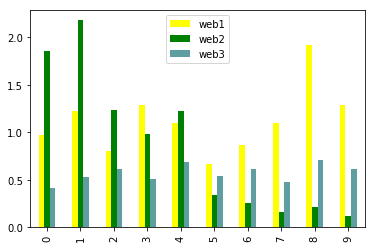

In [13]:
# histogram koji prikazuje profil svake od demografskih grupa
# http://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html
X = reach[['web1', 'web2', 'web3']]
X.plot(kind='bar', color = ['yellow', 'green', 'cadetblue'])

In [1]:
# hocemo da ostvarimo milion pregleda u svakoj demografskoj grupi 
# resavamo sistem X * price priblizno 1000 (jer je cena zadata po hiljadama pregleda)
# koristimo raspolozivu lstsq metodu

In [23]:
goal = 1000 * np.ones(n)
price, _, _, _ = np.linalg.lstsq(X, goal)
price

array([   62.07662454,    99.98500403,  1442.83746254])

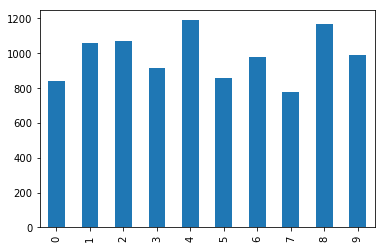

In [22]:
# pregledamo ostvarenja u svakoj demografskoj grupi
result = np.dot(X, price)
pd.Series(result).plot(kind = 'bar')